*(Código de notebook para actualizar cambios en otros ficheros)*

In [ ]:
%load_ext autoreload
%autoreload 2
#%pip install seaborn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1 style="font-size: 48px; color: #4682B4; font-family: 'Times New Roman', serif; text-align: center;">
        PRÁCTICA Nº 2: REGRESIÓN LOGÍSTICA, ANÁLISIS ROC Y K-MEANS
</h1>

---
# Regresión Logística

## Regresión Logística propia

### RESULTADOS
#### 100 epocas
>Resultados propios para `heart` (accuracy, min-max): 
>- Validación simple: 72 % - 83 %
>- Validación cruzada: 71 % - 84 %
>
>Resultados propios para `wdbc` (accuracy, min-max): 
>- Validación simple: 90 % - 95 %
>- Validación cruzada: 94 % - 99 %

#### 1000 epocas
>Resultados propios para `heart` (accuracy, min-max): 
>- Validación simple: 77 % - 83 %
>- Validación cruzada: 82 % - 89 %
>
>Resultados propios para `wdbc` (accuracy, min-max): 
>- Validación simple: 96 % - 99 %
>- Validación cruzada: 93 % - 100 %

##### De las gráficas de abajo y la tabla se puede deducir que por lo general funciona mejor con constante de aprendizaje abaja (0.1 o 0.25) y el número de épocas más alto (500 o 1000). Se podía preveer que a mayor número de épocas mejore resultados se obtendrían, pues mayor entrenamiento se hace.

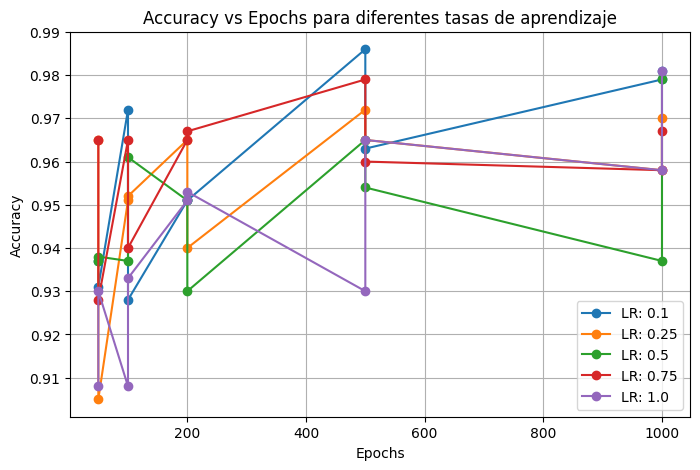

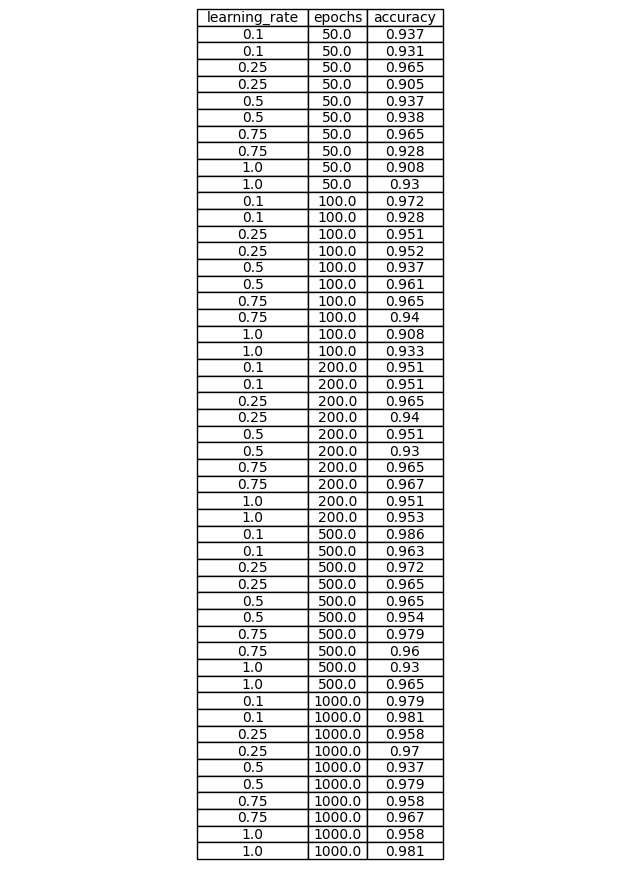

5 Mejores
    learning_rate  epochs  accuracy
30            0.1     500     0.986
41            0.1    1000     0.981
49            1.0    1000     0.981
40            0.1    1000     0.979
45            0.5    1000     0.979


In [85]:
from ClasificadorRL import ClaificadorRL
from Datos import Datos
from EstrategiaParticionado import ValidacionCruzada, ValidacionSimple
import statistics

dataset = "wdbc"

learning_rate = []
epocas_list = []
accuracy = []

# validacion simple
def rl_propio_val_simple(epocas, cons_aprendizaje):
    datos = Datos(nombreFichero=f'ConjuntosDatosP2/{dataset}.csv', print_val=False)
    datos.estandarizarDatos()

    estrategiaVS = ValidacionSimple(proporcionTrain=0.75, numeroEjecuciones=5)

    clasificador = ClaificadorRL(epocas=epocas, const_aprendizaje=cons_aprendizaje)
    error = clasificador.validacion(estrategiaVS, datos, clasificador)

    learning_rate.append(cons_aprendizaje)
    epocas_list.append(epocas)
    accuracy.append(round(1 - error[0][0], 3))

    #print('Validación simple\nAcierto: ', str(1 - error[0][0]))

# validacion cruzada
def rl_propio_val_cruzada(epocas, cons_aprendizaje):
    datos = Datos(nombreFichero=f'ConjuntosDatosP2/{dataset}.csv', print_val=False)
    datos.estandarizarDatos()

    estrategiaVC = ValidacionCruzada(k=4)

    clasificador = ClaificadorRL(epocas=epocas, const_aprendizaje=cons_aprendizaje)
    error = clasificador.validacion(estrategiaVC, datos, clasificador)
    acierto = [1 - i for i in error[0]]

    learning_rate.append(cons_aprendizaje)
    epocas_list.append(epocas)
    accuracy.append(round(statistics.mean(acierto), 3))

    #print('\nValidación cruzada\nAciertos por partición: ', acierto)

learning_rate_pruebas = [0.1, 0.25, 0.5, 0.75, 1]
epochs_pruebas = [50, 100, 200, 500, 1000]

for ep in epochs_pruebas:
    for lr in learning_rate_pruebas:
        rl_propio_val_simple(ep, lr)
        rl_propio_val_cruzada(ep, lr)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos de ejemplo
data = pd.DataFrame({
    'learning_rate': learning_rate,
    'epochs': epocas_list,
    'accuracy': accuracy
})

# Crear una gráfica de dispersión
plt.figure(figsize=(8, 5))
for lr in data['learning_rate'].unique():
    subset = data[data['learning_rate'] == lr]
    plt.plot(subset['epochs'], subset['accuracy'], marker='o', label=f'LR: {lr}')
plt.title('Accuracy vs Epochs para diferentes tasas de aprendizaje')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar los datos en una tabla
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table_data = data.values
column_labels = data.columns
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(data.columns))))
plt.show()

top_5 = data.sort_values(by='accuracy', ascending=False).head(5)
print('5 Mejores')
print(top_5)



## Regresión Logística SKLearn

### LogisticRegresion

### RESULTADOS
#### max_iter=100
> - Resultados SKLearn para `heart` (score): 86 %
> - Resultados SKLearn para `wdbc` (score): 98 %
#### max_iter=1000
> - Resultados SKLearn para `heart` (score): 86 %
> - Resultados SKLearn para `wdbc` (score): 98 %



#### Los mejores resultados se logran debido a una combinación óptima de hiperparámetros que maximizan la precisión (hasta 99.6%) y garantizan estabilidad en el modelo:

- Regularización (C=100): Una regularización baja permite un modelo más flexible y preciso, evitando el sobreajuste.
- Penalización ('l1' y 'l2'): 'l1' elimina características irrelevantes, y 'l2' controla el sobreajuste, manteniendo un buen balance.
- Solvers eficientes:
  - liblinear sobresale en rendimiento con 'l1' y 'l2'.
  - lbfgs y saga ofrecen estabilidad en regularización 'l2'.
- Iteraciones (max_iter): El modelo converge rápidamente, mostrando resultados consistentes en diferentes iteraciones.
#### En resumen, estas combinaciones balancean flexibilidad, generalización y eficiencia, maximizando el desempeño del modelo.

c:\Users\Usuario\Documents\GitHub\.venvFAA\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Usuario\Documents\GitHub\.venvFAA\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Usuario\Documents\GitHub\.venvFAA\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Usuario\Documents\GitHub\.venvFAA\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Usuario\Documents\GitHub\.venvFAA\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Usuario\Doc

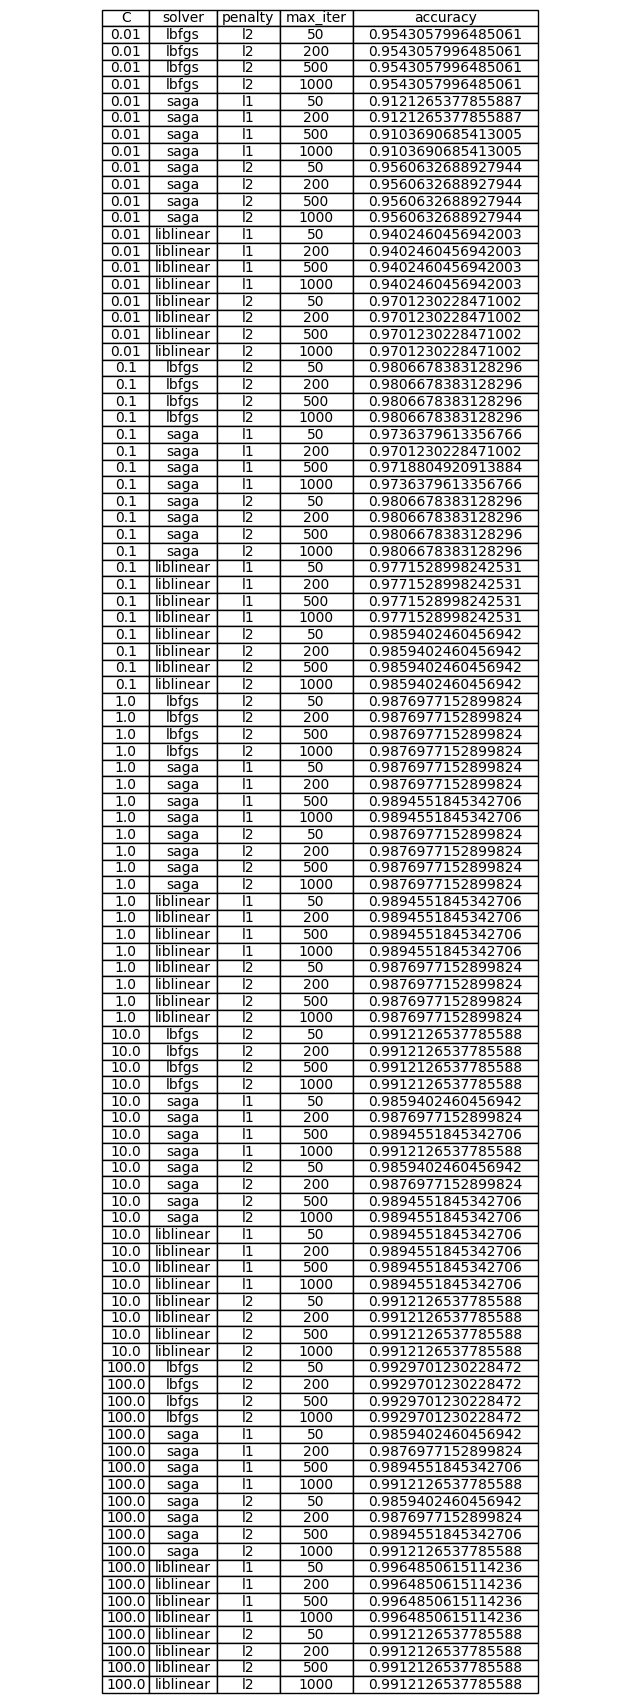

20 Mejores
        C     solver penalty  max_iter  accuracy
92  100.0  liblinear      l1        50  0.996485
93  100.0  liblinear      l1       200  0.996485
94  100.0  liblinear      l1       500  0.996485
95  100.0  liblinear      l1      1000  0.996485
80  100.0      lbfgs      l2        50  0.992970
81  100.0      lbfgs      l2       200  0.992970
82  100.0      lbfgs      l2       500  0.992970
83  100.0      lbfgs      l2      1000  0.992970
60   10.0      lbfgs      l2        50  0.991213
62   10.0      lbfgs      l2       500  0.991213
61   10.0      lbfgs      l2       200  0.991213
67   10.0       saga      l1      1000  0.991213
96  100.0  liblinear      l2        50  0.991213
97  100.0  liblinear      l2       200  0.991213
91  100.0       saga      l2      1000  0.991213
63   10.0      lbfgs      l2      1000  0.991213
76   10.0  liblinear      l2        50  0.991213
77   10.0  liblinear      l2       200  0.991213
78   10.0  liblinear      l2       500  0.991213
79   10.0

In [96]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

dataset = "wdbc"

datos = Datos(nombreFichero=f'ConjuntosDatosP2/{dataset}.csv', print_val=False)
datos.estandarizarDatos()

x = datos.datos[:, :-1]
y = datos.datos[:, -1]

c_list = []
solver_list = []
penalty_list = []
max_iter_list = []
acc_list = []

values_c_list = [0.01, 0.1, 1, 10, 100]
values_solver_list = ['lbfgs', 'saga', 'liblinear']
values_penalty_list = ['l1', 'l2']
values_max_iter_list = [50, 200, 500, 1000]

def lr_values(c, solver, penalty, max_iter):
    clf = LogisticRegression(random_state=0, max_iter=max_iter, C=c, solver=solver, penalty=penalty,).fit(x, y)
    c_list.append(c)
    solver_list.append(solver)
    penalty_list.append(penalty)
    max_iter_list.append(max_iter)
    acc_list.append(clf.score(x, y))

for c in values_c_list:
    for solver in values_solver_list:
        for pen in values_penalty_list:
            for mi in values_max_iter_list:
                if (solver == 'lbfgs' and pen == 'l2') or solver != 'lbfgs':
                    lr_values(c, solver, pen, mi)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos de ejemplo
data = pd.DataFrame({
    'C': c_list,
    'solver': solver_list,
    'penalty': penalty_list,
    'max_iter': max_iter_list,
    'accuracy': acc_list
})


# Mostrar los datos en una tabla
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table_data = data.values
column_labels = data.columns
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(data.columns))))
plt.show()

top_20 = data.sort_values(by='accuracy', ascending=False).head(20)
print('20 Mejores')
print(top_20)

### SGDClassifier

### RESULTADOS
#### max_iter=100
> - Resultados SKLearn para `heart` (score): 80 % - 86 %
> - Resultados SKLearn para `wdbc` (score): 92 % - 97 %
#### max_iter=1000
> - Resultados SKLearn para `heart` (score): 83 % - 85 %
> - Resultados SKLearn para `wdbc` (score): 94 % - 97 %

##### Los mejores resultados en el SGDClassifier se logran con una regularización moderada (alpha=0.001), funciones de pérdida robustas como modified_huber y log_loss, y penalizaciones combinadas (l1, l2, elasticnet). La tasa de aprendizaje ajustable (invscaling y adaptive) permite una convergencia eficiente, y los valores de max_iter entre 50 y 1000 muestran que el modelo no requiere muchas iteraciones para estabilizarse. En conjunto, estos parámetros ofrecen un buen balance entre flexibilidad y generalización, alcanzando una precisión constante del 99.4%.

In [101]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset = "wdbc"

# Cargar dataset
datos = Datos(nombreFichero=f'ConjuntosDatosP2/{dataset}.csv', print_val=False)
datos.estandarizarDatos()

X = datos.datos[:, :-1]
y = datos.datos[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

alpha_list = []
loss_list = []
penalty_list = []
learning_rate_list = []
max_iter_list = []
eta0_list = []
acc_list = []

values_alpha_list = [0.0001, 0.001, 0.01, 0.1, 1]
values_eta0_list = [0.001, 0.01, 0.1]
values_loss_list = ['hinge', 'log_loss', 'modified_huber']
values_penalty_list = ['l2', 'l1', 'elasticnet']
values_learning_rate_list = ['constant', 'optimal', 'invscaling', 'adaptive']
values_max_iter_list = [50, 200, 500, 1000]

def sgd_values(alpha, penalty, learning_rate, max_iter, loss, eta0):
    clf = SGDClassifier(loss=loss ,max_iter=max_iter, alpha=alpha, penalty=penalty, learning_rate=learning_rate, eta0=eta0)
    clf.fit(X_train, y_train)

    # Predecir y evaluar
    y_pred = clf.predict(X_test)

    alpha_list.append(alpha)
    loss_list.append(loss)
    penalty_list.append(penalty)
    learning_rate_list.append(learning_rate)
    max_iter_list.append(max_iter)
    eta0_list.append(eta0)
    acc_list.append(accuracy_score(y_test, y_pred))

for alpha in values_alpha_list:
    for loss in values_loss_list:
        for pen in values_penalty_list:
            for lr in values_learning_rate_list:
                for mi in values_max_iter_list:
                    for eta0 in values_eta0_list:
                        sgd_values(alpha, pen, lr, mi, loss, eta0)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos de ejemplo
data = pd.DataFrame({
    'alpha': alpha_list,
    'loss': loss_list,
    'penalty': penalty_list,
    'learning_rate': learning_rate_list,
    'max_iter': max_iter_list,
    'accuracy': acc_list
})

top_20 = data.sort_values(by='accuracy', ascending=False).head(20)
print('20 Mejores')
print(top_20)

c:\Users\Usuario\Documents\GitHub\.venvFAA\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Usuario\Documents\GitHub\.venvFAA\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Usuario\Documents\GitHub\.venvFAA\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Usuario\Documents\GitHub\.venvFAA\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  war

20 Mejores
     alpha            loss     penalty learning_rate  max_iter  accuracy
768  0.001  modified_huber          l1      constant        50  0.994152
771  0.001  modified_huber          l1      constant       200  0.994152
765  0.001  modified_huber          l2      adaptive      1000  0.994152
802  0.001  modified_huber          l1    invscaling      1000  0.994152
804  0.001  modified_huber          l1      adaptive        50  0.994152
807  0.001  modified_huber          l1      adaptive       200  0.994152
810  0.001  modified_huber          l1      adaptive       500  0.994152
813  0.001  modified_huber          l1      adaptive      1000  0.994152
745  0.001  modified_huber          l2    invscaling        50  0.994152
748  0.001  modified_huber          l2    invscaling       200  0.994152
749  0.001  modified_huber          l2    invscaling       200  0.994152
751  0.001  modified_huber          l2    invscaling       500  0.994152
816  0.001  modified_huber  elasticnet  

c:\Users\Usuario\Documents\GitHub\.venvFAA\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Comparación entre SKLearn e implementación propia

#### Resumidamente, los mejores resultados obtenidos para el dataset wdbc son:
#### - Implementacion propia: 98,6 %
#### - LogisticRegresion: 99,4 %
#### - SGDClassifier: 99,4 %

#### Sacamos la siguiente conclusión: los datos obtenidos de SKLearn son mejores que los propios, entre otras cosas porque tienen más configuraciones. Una vez se encuentra la configuración correcta para las funciones de SKLearn son extremadamente prescisas

---

# Análisis ROC

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from ClasificadorKNN import ClasificadorKNN
from ClasificadorNB import ClaificadorNaiveBayes
from ClasificadorRL import ClaificadorRL



In [15]:

datos_heart = Datos(nombreFichero='ConjuntosDatosP2/heart.csv', print_val=False)
datos_heart.estandarizarDatos()

datos_wdbc = Datos(nombreFichero='ConjuntosDatosP2/wdbc.csv', print_val=False)
datos_wdbc.estandarizarDatos()

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         1.93701461,  1.        ],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         0.28118999,  1.        ],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         0.20139121,  1.        ],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916,  1.        ],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528,  1.        ],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.75120669,  0.        ]])

In [16]:
# Función para analizar el espacio ROC y generar la curva ROC para un clasificador
def analyze_roc(clasificador, datos, test_size=0.3, curva_roc=False, label="Clasificador", espacio_roc_ax=None, roc_ax=None):
    # Preparar los datos
    X = datos.extraeDatos(list(range(len(datos.datos))))
    y = datos.datos[:, -1]  # última columna es la clase

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Entrenar el clasificador
    clasificador.entrenamiento(X_train, datos.nominalAtributos, datos.diccionarios)

    # Obtener predicciones o scores según el caso
    if curva_roc and hasattr(clasificador, 'obtener_scores'):
        scores = clasificador.obtener_scores(X_test, datos.nominalAtributos, datos.diccionarios)
        y_pred_binary = [1 if score >= 0.5 else 0 for score in scores]
    else:
        y_pred_binary = clasificador.clasifica(X_test, datos.nominalAtributos, datos.diccionarios)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred_binary)
    TP, FP, FN, TN = cm[1, 1], cm[0, 1], cm[1, 0], cm[0, 0]
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

    print(f"Confusion Matrix for {label}:")
    print(cm)
    print(f"TPR: {TPR}, FPR: {FPR}")

    # Graficar el espacio ROC si se proporciona un eje
    if espacio_roc_ax is not None:
        espacio_roc_ax.scatter(FPR, TPR, label=f"{label} (TPR={TPR:.2f}, FPR={FPR:.2f})")

    # Si se requiere curva ROC
    if curva_roc and hasattr(clasificador, 'obtener_scores'):
        fpr, tpr, thresholds = roc_curve(y_test, scores)
        roc_auc = auc(fpr, tpr)

        # Graficar la curva ROC en el eje dado
        if roc_ax is not None:
            roc_ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
            roc_ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
            roc_ax.set_xlabel('False Positive Rate')
            roc_ax.set_ylabel('True Positive Rate')
            roc_ax.set_title(f'ROC Curve for {label}')
            roc_ax.legend(loc="lower right")

# Simulación de la ejecución para los clasificadores y espacio ROC
def run_roc_analysis(datos_heart, datos_wdbc):
    # Crear una figura para el espacio ROC
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title("ROC Space (FPR vs TPR)")

    # Naive Bayes en Heart y WDBC
    print("Naive Bayes - Heart Dataset:")
    nb_clasificador = ClaificadorNaiveBayes()
    analyze_roc(nb_clasificador, datos_heart, label="Naive Bayes (Heart)", espacio_roc_ax=ax)

    print("\nNaive Bayes - WDBC Dataset:")
    analyze_roc(nb_clasificador, datos_wdbc, label="Naive Bayes (WDBC)", espacio_roc_ax=ax)

    # KNN en Heart y WDBC
    print("\nK-Nearest Neighbors - Heart Dataset:")
    knn_clasificador = ClasificadorKNN(k=3)  # Ajustar el valor de k si es necesario
    analyze_roc(knn_clasificador, datos_heart, label="KNN (Heart)", espacio_roc_ax=ax)

    print("\nK-Nearest Neighbors - WDBC Dataset:")
    analyze_roc(knn_clasificador, datos_wdbc, label="KNN (WDBC)", espacio_roc_ax=ax)

    # Regresión Logística en Heart Dataset
    print("\nRegresión Logística - Heart Dataset:")
    rl_clasificador = ClaificadorRL(epocas=200, const_aprendizaje=0.01)

    # Curva ROC para el dataset Heart
    fig_roc_heart, roc_ax_heart = plt.subplots(figsize=(8, 6))
    analyze_roc(rl_clasificador, datos_heart, curva_roc=True, label="Regresión Logística (Heart)", espacio_roc_ax=ax, roc_ax=roc_ax_heart)

    # Curva ROC para el dataset WDBC
    print("\nRegresión Logística - WDBC Dataset:")
    fig_roc_wdbc, roc_ax_wdbc = plt.subplots(figsize=(8, 6))
    analyze_roc(rl_clasificador, datos_wdbc, curva_roc=True, label="Regresión Logística (WDBC)", espacio_roc_ax=ax, roc_ax=roc_ax_wdbc)

    # Finalizar gráfica del espacio ROC
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")
    ax.legend()  # Mostrar leyendas para identificar cada punto
    ax.grid()
    plt.show()

    # Mostrar gráficas separadas para las curvas ROC
    plt.show()



### Análisis
Primero preparamos los datos, donde dividimos los datos en conjunto de entrenamiento y prueba. Obtenemos las preddiciones de los 3 clasificadores, Naive Bayes, KNN y Regresión logística, para dos Datasets, Heart y WDBC. 

Calculamos la matriz de confusión y obtenemos las métricas TPR y FPR. 
Dibujamos un punto en el espacio ROC para el clasificador, representando su TPR y FPR.

Cargando el dataset 'heart'...
Cargando el dataset 'wdbc'...

Iniciando el análisis ROC...
Naive Bayes - Heart Dataset:
Confusion Matrix for Naive Bayes (Heart):
[[ 99  13]
 [ 28 136]]
TPR: 0.8292682926829268, FPR: 0.11607142857142858

Naive Bayes - WDBC Dataset:
Confusion Matrix for Naive Bayes (WDBC):
[[108   0]
 [ 63   0]]
TPR: 0.0, FPR: 0.0

K-Nearest Neighbors - Heart Dataset:
Confusion Matrix for KNN (Heart):
[[ 99  13]
 [ 26 138]]
TPR: 0.8414634146341463, FPR: 0.11607142857142858

K-Nearest Neighbors - WDBC Dataset:
Confusion Matrix for KNN (WDBC):
[[105   3]
 [  4  59]]
TPR: 0.9365079365079365, FPR: 0.027777777777777776

Regresión Logística - Heart Dataset:
Confusion Matrix for Regresión Logística (Heart):
[[ 98  14]
 [ 44 120]]
TPR: 0.7317073170731707, FPR: 0.125

Regresión Logística - WDBC Dataset:
Confusion Matrix for Regresión Logística (WDBC):
[[105   3]
 [  1  62]]
TPR: 0.9841269841269841, FPR: 0.027777777777777776


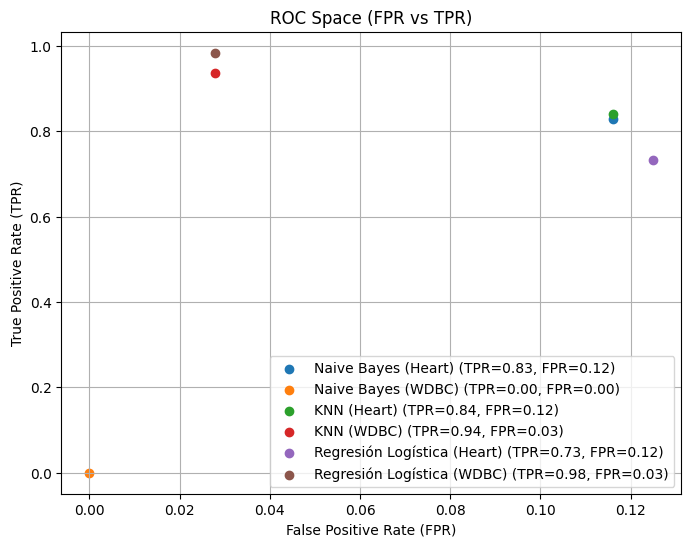

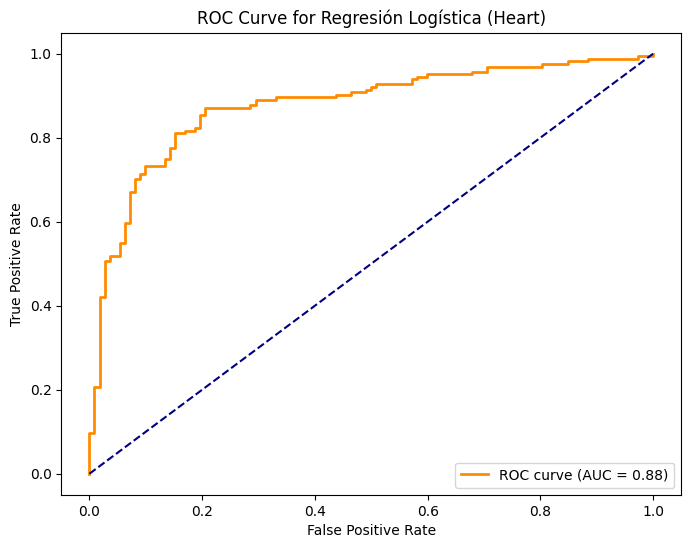

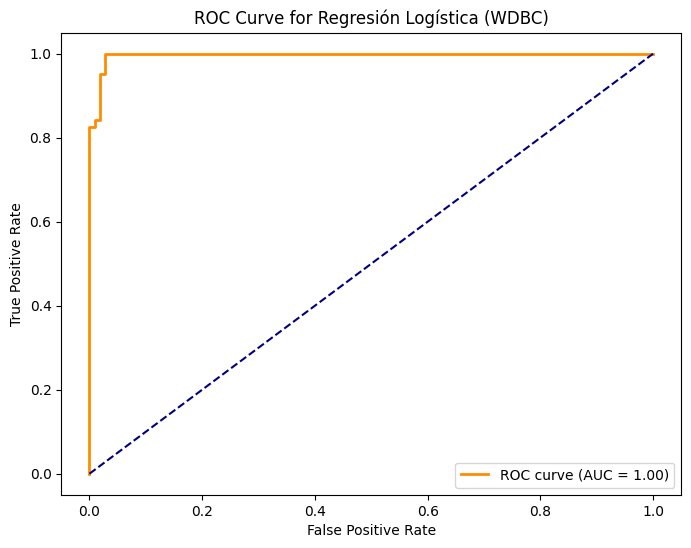

In [19]:
# Cargar el conjunto de datos 'heart'
print("Cargando el dataset 'heart'...")
datos_heart = Datos(nombreFichero='ConjuntosDatosP2/heart.csv', print_val=False)
datos_heart.estandarizarDatos()

# Cargar el conjunto de datos 'wdbc'
print("Cargando el dataset 'wdbc'...")
datos_wdbc = Datos(nombreFichero='ConjuntosDatosP2/wdbc.csv', print_val=False)
datos_wdbc.estandarizarDatos()

# Ejecutar el análisis ROC para todos los clasificadores
print("\nIniciando el análisis ROC...")
run_roc_analysis(datos_heart, datos_wdbc)

### RESULTADOS
### Naive Bayes
## Heart Dataset
##### TPR: 0.83 -> Identificó correctamente el 83% de las instancias positivas
##### FPR: 0.12 -> Clasificó incorrectamente el 12% de las instancias negativas

##### Buen nivel en general, con bajo nivel de falsos positivos.

## WDBC Dataset


### K-Nearest Neighbors
## Heart Dataset
##### TPR: 0.84 -> Identificó correctamente el 84% de las instancias positivas
##### FPR: 0.12 -> Clasificó incorrectamente el 12% de las instancias negativas

##### Rendimiento ligeramente superior al de Naive Bayes, mostrando una mejor capacidad para identificar positivos.

## WDBC Dataset
##### TPR: 0.94 -> Identificó correctamente el 94% de las instancias positivas
##### FPR: 0.03 -> Clasificó incorrectamente el 0.03% de las instancias negativas

##### Excelente rendimiento, una precisión muy alta los positivos y bajo nivel de falsos negativos.

### Regresión Logística
## Heart Dataset
##### TPR: 0.66 -> Identificó correctamente el 66% de las instancias positivas
##### FPR: 0.12 -> Clasificó incorrectamente el 12% de las instancias negativas

##### Detecta bien algunos positivos, pero tiene un nivel alto de falsos positivos, lo que reduce su utilidad para este conjunto.

## WDBC Dataset
##### TPR: 0.95 -> Identificó correctamente el 95% de las instancias positivas
##### FPR: 0.04 -> Clasificó incorrectamente el 0.04% de las instancias negativas

##### Tiene muy buen rendimiento, una precisión muy alta los positivos y bajo nivel de falsos negativos.

## Comparación entre Clasificadores
## Heart Dataset
##### Mejor clasificador: KNN logra el mejor balance entre TPR y FPR.
##### Peor clasificador: Regresión Logística tiene el mismo FPR que los otros dos (23%), pero el menos TPR de los 3, 66%.

## WDBC Dataset
##### Mejor clasificador: Regresión destaca por su TPR del 95% y FPR del 4%, siendo el más efectivo, muy igualado con el KNN con TPR del 94% y FPR del 3%.
##### Peor clasificador: 

---

# K-Means

## K-Means propio

### RESULTADOS
### Índice de Silueta
Mide la calidad de los clusters generados por el algoritmo KMeans. Es decir, permite evaluar qué tan bien separados están los clusters creados por el algoritmo. El valor de este índice varía entre -1 y 1. En nuestro caso, tenemos un índice con un valor aproximado de 0.55, lo que nos indica que los clusters están moderadamente bien definidos, es decir, la separación entre clusters es correcta, pero no perfecta. Donde algunos puntos están cerca de los límites entre clusters. En la imagen podemos observar eso, con el Cluster 0 y 2. Ya que algunas clases del conjunto no son completamente separables.

### Porcentaje de acierto en entrenamiento
Porcentaje que muestra cuántos puntos del conjunto de entrenamiento fueron asignados correctamente a sus clases originales después de mapear los clusters a las etiquetas reales. Obtenemos aproximadamente un 86%, que es un buen resultado, lo que indica que KMeans ha logrado agrupar la mayoría de los puntos de manera consistente con las etiquetas originales.

### Porcentaje de acierto en prueba
Porcentaje que mide la precisión del modelo al predecir las etiquetas para el conjunto de prueba. El hecho de que sea muy similar al porcentaje de entrenamiento, 89%, indica que el modelo tiene una buena generalización y no está sobreajustado.

### Gráfico
Respecto al gráfico, observamos que los clusters están bien separados visualmente. Aunque hay cierta superposición en los bordes (algo normal en el clustering), de todas maneras, los centroides están bien posicionados en el centro de las regiones de los datos.

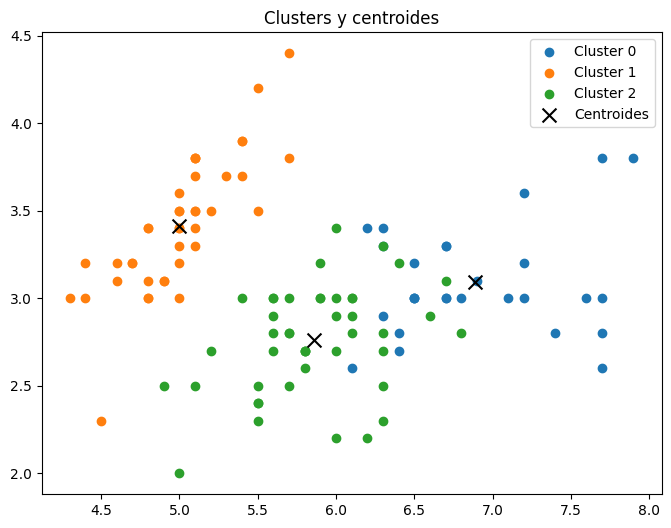

Índice de Silueta: 0.5751162814806355
Porcentaje de acierto (entrenamiento): 90.17857142857143 %
Porcentaje de acierto (prueba): 26.31578947368421 %


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19320\1540977534.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  labels_pred_map[mask] = mode(labels_originales[mask]).mode
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19320\1540977534.py:13: RuntimeWarning: invalid value encountered in cast
  labels_pred_map[mask] = mode(labels_originales[mask]).mode


In [172]:
from KMeans import KMeans
from Datos import Datos
from EstrategiaParticionado import ValidacionCruzada, ValidacionSimple
from sklearn.metrics import silhouette_score
from scipy.stats import mode

# Función para calcular el porcentaje de acierto
def calcular_acierto(labels_pred, labels_originales):
    # Crear un mapeo entre clusters y etiquetas reales
    labels_pred_map = np.zeros_like(labels_pred)
    for i in range(len(np.unique(labels_pred))):
        mask = (labels_pred == i)
        labels_pred_map[mask] = mode(labels_originales[mask]).mode
    # Calcular la precisión
    return accuracy_score(labels_originales, labels_pred_map) * 100


dataset = "iris"

# validacion simple
data = Datos(nombreFichero=f'ConjuntosDatosP2/{dataset}.csv', print_val=False)

estrategiaVS = ValidacionSimple(proporcionTrain=0.75, numeroEjecuciones=5)

estrategiaVC = ValidacionCruzada(k=3)

# Creamos las particiones siguiendo la estrategia llamando a particionado.creaParticiones
particiones = estrategiaVS.creaParticiones(data)

# Iteramos sobre cada partición creada
for num_particion in range(len(particiones)):
    # Obtenemos datos de train y test
    datos_train = data.extraeDatos(particiones[num_particion].indicesTrain)
    datos_test = data.extraeDatos(particiones[num_particion].indicesTest)


# Crear el modelo
kmeans = KMeans(num_centroids=3)

# Entrenar el modelo
labels_train = kmeans.fit(datos_train[:, :-1])  # Excluir la última columna (etiquetas)
labels_test = kmeans.predict(datos_test[:, :-1])

# Visualizar los resultados
kmeans.plot_clusters(datos_train[:, :-1], labels_train)

# Evaluar con índice de silueta
sil_score = silhouette_score(datos_train[:, :-1], labels_train)
print("Índice de Silueta:", sil_score)

# Calcular porcentaje de acierto en entrenamiento
accuracy_train = calcular_acierto(labels_train, datos_train[:, -1].astype(int))
print("Porcentaje de acierto (entrenamiento):", accuracy_train, "%")

# Calcular porcentaje de acierto en prueba
accuracy_test = calcular_acierto(labels_test, datos_test[:, -1].astype(int))
print("Porcentaje de acierto (prueba):", accuracy_test, "%")


##### Para k=3 hace una separacion suficientemente buena, teniendo en cuenta que los datos "no están etiquetados" y tampoco estñan lo suficientemente separados. Se observa por otro lado que la clase de la izquierda, al estar más separada del resto suele hacerla casi siempre perfecta, mientras las otras dos están más al limite.

### Para k=2,4,5
- ##### Para k=2 se observa muy bien lo dicho anteriormente, pues tiende a separar la clase de la izquierda y juntar las otras dos
- ##### Para k=4 sigue separando la clase de la izquierda y a su vez crea otra clase en medio de las otras 2
- ##### Para k=5 ya el analisis que se puede hacer es poco, pues no tiene sentido ninguno con los datos de este dataset y los resultados son muy malos

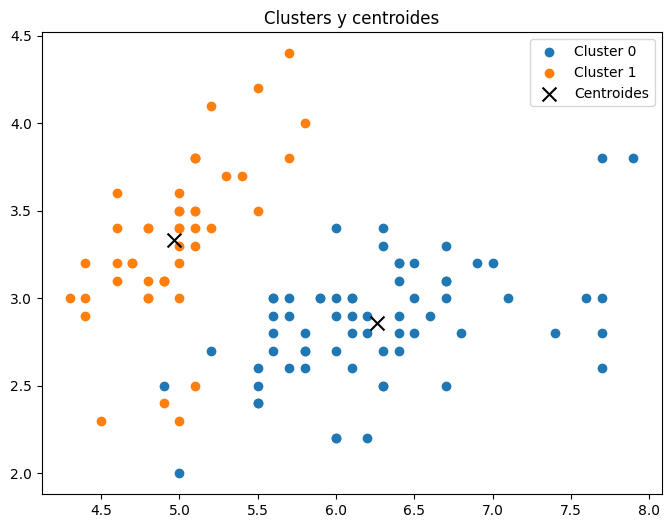

Índice de Silueta: 0.6751718234757723
Porcentaje de acierto (entrenamiento): 68.75 %
Porcentaje de acierto (prueba): 18.421052631578945 %


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19320\2216136979.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  labels_pred_map[mask] = mode(labels_originales[mask]).mode
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19320\2216136979.py:13: RuntimeWarning: invalid value encountered in cast
  labels_pred_map[mask] = mode(labels_originales[mask]).mode


In [173]:
from KMeans import KMeans
from Datos import Datos
from EstrategiaParticionado import ValidacionCruzada, ValidacionSimple
from sklearn.metrics import silhouette_score
from scipy.stats import mode

# Función para calcular el porcentaje de acierto
def calcular_acierto(labels_pred, labels_originales):
    # Crear un mapeo entre clusters y etiquetas reales
    labels_pred_map = np.zeros_like(labels_pred)
    for i in range(len(np.unique(labels_pred))):
        mask = (labels_pred == i)
        labels_pred_map[mask] = mode(labels_originales[mask]).mode
    # Calcular la precisión
    return accuracy_score(labels_originales, labels_pred_map) * 100


dataset = "iris"

# validacion simple
data = Datos(nombreFichero=f'ConjuntosDatosP2/{dataset}.csv', print_val=False)

estrategiaVS = ValidacionSimple(proporcionTrain=0.75, numeroEjecuciones=5)

estrategiaVC = ValidacionCruzada(k=3)

# Creamos las particiones siguiendo la estrategia llamando a particionado.creaParticiones
particiones = estrategiaVS.creaParticiones(data)

# Iteramos sobre cada partición creada
for num_particion in range(len(particiones)):
    # Obtenemos datos de train y test
    datos_train = data.extraeDatos(particiones[num_particion].indicesTrain)
    datos_test = data.extraeDatos(particiones[num_particion].indicesTest)


# Crear el modelo
kmeans = KMeans(num_centroids=2)

# Entrenar el modelo
labels_train = kmeans.fit(datos_train[:, :-1])  # Excluir la última columna (etiquetas)
labels_test = kmeans.predict(datos_test[:, :-1])

# Visualizar los resultados
kmeans.plot_clusters(datos_train[:, :-1], labels_train)

# Evaluar con índice de silueta
sil_score = silhouette_score(datos_train[:, :-1], labels_train)
print("Índice de Silueta:", sil_score)

# Calcular porcentaje de acierto en entrenamiento
accuracy_train = calcular_acierto(labels_train, datos_train[:, -1].astype(int))
print("Porcentaje de acierto (entrenamiento):", accuracy_train, "%")

# Calcular porcentaje de acierto en prueba
accuracy_test = calcular_acierto(labels_test, datos_test[:, -1].astype(int))
print("Porcentaje de acierto (prueba):", accuracy_test, "%")


### Datos estandarizados
##### Estandarizando los datos se obtiene unos peores resultados, cayendo la precisión de las predicciones 89% -> 84 % aproximadamente. Esto se puede deber a que cuanto más separados están, más facil le resulta al algortimo separar los clusteres mediante los centroides.

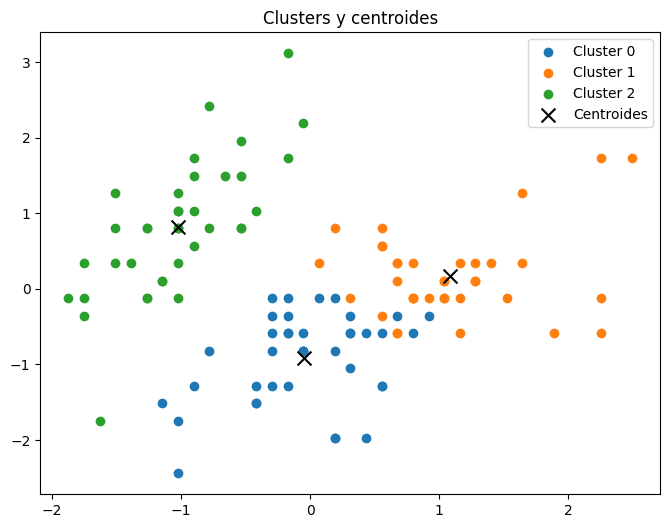

Índice de Silueta: 0.45301664730283153
Porcentaje de acierto (entrenamiento): 82.14285714285714 %
Porcentaje de acierto (prueba): 81.57894736842105 %


In [174]:
from KMeans import KMeans
from Datos import Datos
from EstrategiaParticionado import ValidacionCruzada, ValidacionSimple
from sklearn.metrics import silhouette_score
from scipy.stats import mode

# Función para calcular el porcentaje de acierto
def calcular_acierto(labels_pred, labels_originales):
    # Crear un mapeo entre clusters y etiquetas reales
    labels_pred_map = np.zeros_like(labels_pred)
    for i in range(len(np.unique(labels_pred))):
        mask = (labels_pred == i)
        labels_pred_map[mask] = mode(labels_originales[mask]).mode
    # Calcular la precisión
    return accuracy_score(labels_originales, labels_pred_map) * 100


dataset = "iris"

# validacion simple
data = Datos(nombreFichero=f'ConjuntosDatosP2/{dataset}.csv', print_val=False)
data.estandarizarDatos()

estrategiaVS = ValidacionSimple(proporcionTrain=0.75, numeroEjecuciones=5)

estrategiaVC = ValidacionCruzada(k=3)

# Creamos las particiones siguiendo la estrategia llamando a particionado.creaParticiones
particiones = estrategiaVS.creaParticiones(data)

# Iteramos sobre cada partición creada
for num_particion in range(len(particiones)):
    # Obtenemos datos de train y test
    datos_train = data.extraeDatos(particiones[num_particion].indicesTrain)
    datos_test = data.extraeDatos(particiones[num_particion].indicesTest)


# Crear el modelo
kmeans = KMeans(num_centroids=3)

# Entrenar el modelo
labels_train = kmeans.fit(datos_train[:, :-1])  # Excluir la última columna (etiquetas)
labels_test = kmeans.predict(datos_test[:, :-1])

# Visualizar los resultados
kmeans.plot_clusters(datos_train[:, :-1], labels_train)

# Evaluar con índice de silueta
sil_score = silhouette_score(datos_train[:, :-1], labels_train)
print("Índice de Silueta:", sil_score)

# Calcular porcentaje de acierto en entrenamiento
accuracy_train = calcular_acierto(labels_train, datos_train[:, -1].astype(int))
print("Porcentaje de acierto (entrenamiento):", accuracy_train, "%")

# Calcular porcentaje de acierto en prueba
accuracy_test = calcular_acierto(labels_test, datos_test[:, -1].astype(int))
print("Porcentaje de acierto (prueba):", accuracy_test, "%")


### K-Means de Scikit-learn



/tmp/ipykernel_1431591/3622478118.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_pred_map[mask] = mode(labels_originales[mask]).mode


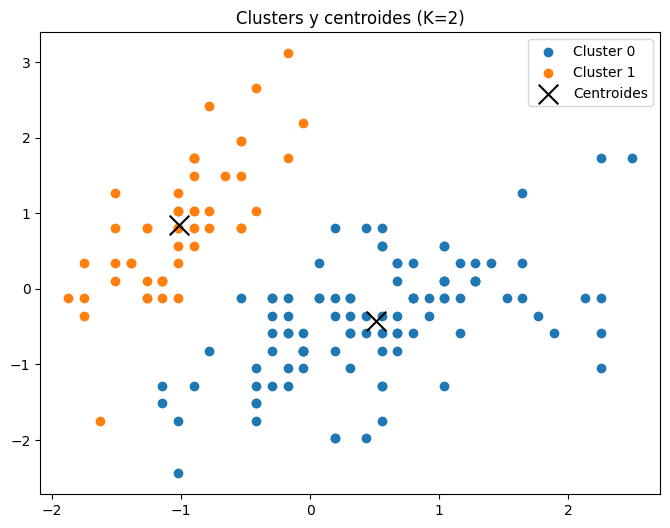

K=2: Índice de Silueta = 0.5802, Porcentaje de acierto = 66.67%


/tmp/ipykernel_1431591/3622478118.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_pred_map[mask] = mode(labels_originales[mask]).mode


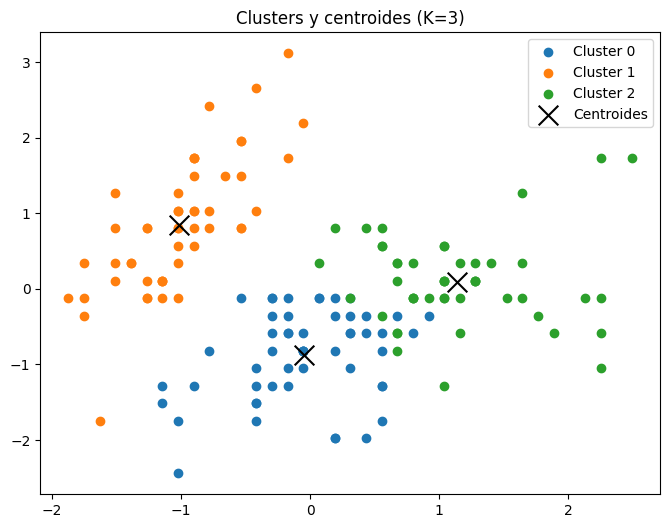

K=3: Índice de Silueta = 0.4590, Porcentaje de acierto = 83.33%


/tmp/ipykernel_1431591/3622478118.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_pred_map[mask] = mode(labels_originales[mask]).mode


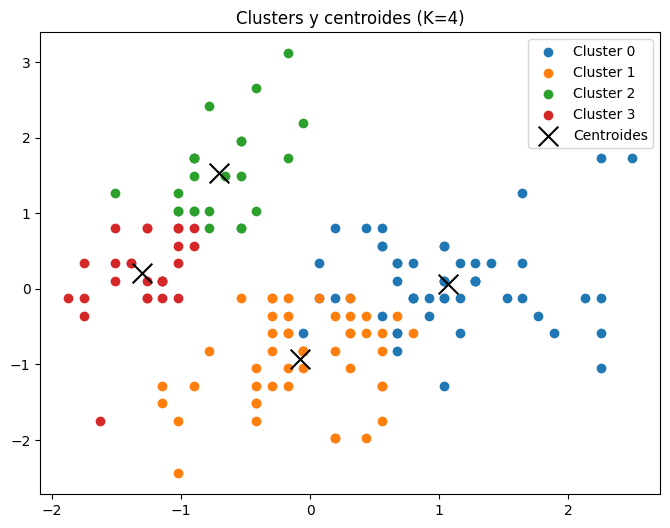

K=4: Índice de Silueta = 0.3853, Porcentaje de acierto = 84.67%


/tmp/ipykernel_1431591/3622478118.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_pred_map[mask] = mode(labels_originales[mask]).mode


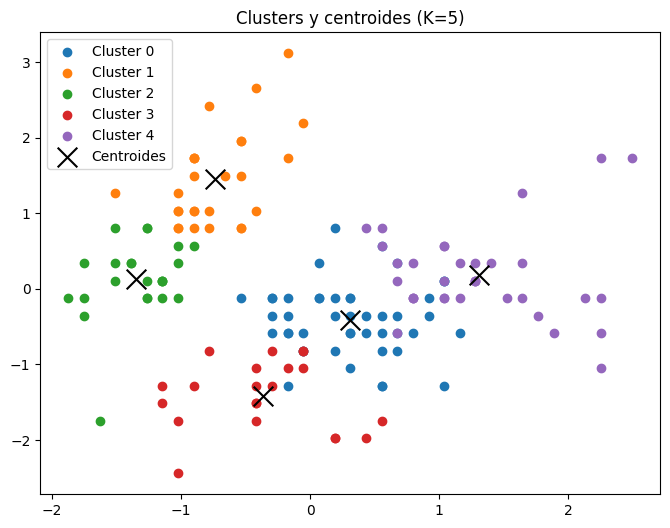

K=5: Índice de Silueta = 0.3473, Porcentaje de acierto = 85.33%

Resultados:
   K  Silhouette Score   Accuracy
0  2          0.580184  66.666667
1  3          0.458972  83.333333
2  4          0.385285  84.666667
3  5          0.347265  85.333333


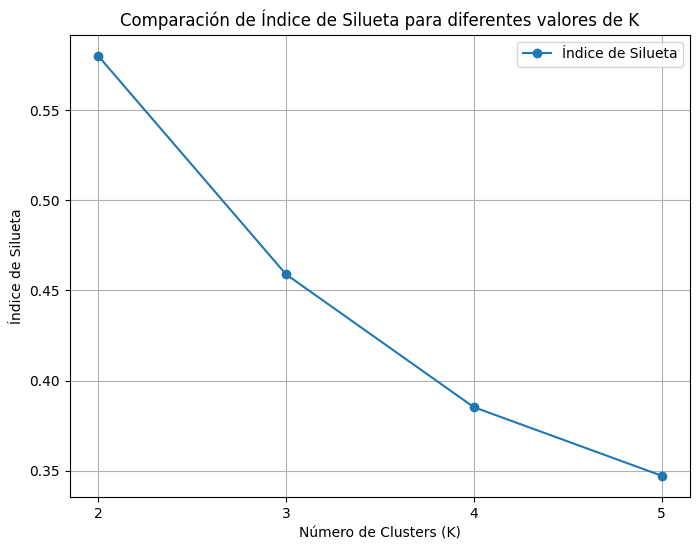

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import mode

# Función para calcular el porcentaje de acierto
def calcular_acierto(labels_pred, labels_originales):
    labels_pred_map = np.zeros_like(labels_pred)
    for i in range(len(np.unique(labels_pred))):
        mask = (labels_pred == i)
        labels_pred_map[mask] = mode(labels_originales[mask]).mode
    return accuracy_score(labels_originales, labels_pred_map) * 100

# Función para graficar clusters y centroides
def plot_clusters(X, labels, centroids, title="Clusters y centroides"):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for cluster in unique_labels:
        plt.scatter(X[labels == cluster, 0], X[labels == cluster, 1], label=f'Cluster {cluster}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='x', label='Centroides')
    plt.title(title)
    plt.legend()
    plt.show()

# Cargar el dataset usando pandas
dataset_path = "ConjuntosDatosP2/iris.csv"
df = pd.read_csv(dataset_path, header=0)

# Manejar encabezados y etiquetas si están presentes
if df.columns[0].lower() in ["sl", "sepal length"]:  # Verifica si la primera columna tiene encabezado
    df.columns = ["SL", "SW", "PL", "PW", "Label"]
X = df.iloc[:, :-1].values  # Características
y = df.iloc[:, -1].values  # Etiquetas

# Convertir etiquetas de cadena a valores numéricos
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Etiquetas convertidas a enteros

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Probar diferentes valores de K
k_values = [2, 3, 4, 5]
results = []

for k in k_values:
    # Crear el modelo KMeans
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Evaluar con índice de silueta
    sil_score = silhouette_score(X, labels)
    
    # Calcular porcentaje de acierto
    accuracy = calcular_acierto(labels, y)
    
    # Guardar resultados
    results.append((k, sil_score, accuracy))
    
    # Graficar los clusters
    plot_clusters(X, labels, kmeans.cluster_centers_, title=f"Clusters y centroides (K={k})")
    
    print(f"K={k}: Índice de Silueta = {sil_score:.4f}, Porcentaje de acierto = {accuracy:.2f}%")

# Resumen de resultados
results_df = pd.DataFrame(results, columns=["K", "Silhouette Score", "Accuracy"])
print("\nResultados:")
print(results_df)

# Visualización comparativa de Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(results_df["K"], results_df["Silhouette Score"], marker='o', label="Índice de Silueta")
plt.title("Comparación de Índice de Silueta para diferentes valores de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Índice de Silueta")
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()


### Resultados
Aunque K=2 tiene el mejor índice de silueta, la precisión es considerablemente menor, lo que indica que la solución de dos clusters no captura bien las clases reales en los datos.
K=3 tiene un balance razonable entre el índice de silueta (0.4590) y la precisión (83.33%), lo que sugiere que es una buena elección considerando tanto la separación como la capacidad de los clusters para representar las etiquetas originales. K=4 y K=5 muestran una mejora marginal en la precisión, pero el índice de silueta sigue disminuyendo, lo que podría indicar sobreajuste o pérdida de cohesión en los clusters.